In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [29]:
df = pd.read_csv(r"C:\Users\Aditi\Documents\ArkaShine\values.csv")

In [30]:
df.head()

,A(410),B(435),C(460),D(485),E(510),F(535),G(560),H(585),R(610),I(645),...,P (kg/ha),K (kg/ha),Ca (meq/100g),Mg (meq/100g),S (ppm),Fe (ppm),Mn (ppm),Cu (ppm),Zn (ppm),B (ppm)
0,2429.58,1108.99,2091.93,737.33,835.14,1376.82,322.87,318.87,1305.33,163.26,...,26.10,444.00,6.14,2.32,11.21,3.08,14.10,2.23,0.84,1.22
1,1707.90,725.38,1974.49,670.81,835.93,1685.28,370.31,373.60,1335.77,185.56,...,81.99,372.00,5.98,0.50,12.93,47.74,37.63,3.28,6.79,1.13
2,1750.41,1102.02,2481.05,816.80,960.65,1741.43,430.51,437.88,1206.99,227.04,...,80.59,132.00,3.15,2.49,5.17,14.96,44.53,1.22,1.21,0.98
3,2546.68,1548.40,2791.56,1007.16,1128.00,1573.73,488.66,499.63,1338.11,261.84,...,33.81,221.76,3.40,1.90,11.59,6.38,10.62,1.77,0.99,0.27
4,3090.54,1266.42,2933.88,940.61,1109.84,2047.64,500.91,512.70,1482.11,267.19,...,38.19,234.08,6.60,5.20,34.10,14.08,3.56,1.56,0.40,0.77


# Data PreProcessing

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   A(410)         99 non-null     float64
 1   B(435)         99 non-null     float64
 2   C(460)         99 non-null     float64
 3   D(485)         99 non-null     float64
 4   E(510)         99 non-null     float64
 5   F(535)         99 non-null     float64
 6   G(560)         99 non-null     float64
 7   H(585)         99 non-null     float64
 8   R(610)         99 non-null     float64
 9   I(645)         99 non-null     float64
 10  S(680)         99 non-null     float64
 11  J(705)         99 non-null     float64
 12  U(760)         99 non-null     float64
 13  V(810)         99 non-null     float64
 14  W(860)         99 non-null     float64
 15  K(900)         99 non-null     float64
 16  L(940)         99 non-null     float64
 17  T(730)         99 non-null     float64
 18  pH         

In [32]:
df.isna().sum() #checking for the null Values

A(410)           1
B(435)           1
C(460)           1
D(485)           1
E(510)           1
F(535)           1
G(560)           1
H(585)           1
R(610)           1
I(645)           1
S(680)           1
J(705)           1
U(760)           1
V(810)           1
W(860)           1
K(900)           1
L(940)           1
T(730)           1
pH               5
EC  (dS/m)       5
OC (%)           5
P   (kg/ha)      5
K (kg/ha)        5
Ca (meq/100g)    8
Mg (meq/100g)    5
S (ppm)          5
Fe (ppm)         5
Mn (ppm)         5
Cu (ppm)         5
Zn (ppm)         5
B (ppm)          5
dtype: int64

In [33]:
#Descriptive Statistics of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
A(410),99.0,2163.039798,613.052886,642.74,1819.365,2098.23,2410.930,3820.02
B(435),99.0,1015.779354,220.398645,256.27,899.895,1016.33,1109.985,1820.42
C(460),99.0,2471.640101,455.244317,964.36,2167.565,2393.45,2749.005,3658.38
D(485),99.0,744.820303,274.814008,217.34,637.945,687.89,859.760,2977.66
E(510),99.0,963.049697,163.991707,88.03,896.605,983.54,1064.050,1394.80
F(535),99.0,1475.602222,360.414184,736.70,1204.780,1352.12,1860.095,2241.63
G(560),99.0,398.516061,63.644213,192.25,361.575,391.27,442.045,567.56
H(585),99.0,415.789899,121.256245,215.18,373.100,399.71,445.700,1427.09
R(610),99.0,1132.656061,270.599597,193.59,952.950,1135.58,1344.550,1992.54
I(645),99.0,205.911919,45.414860,30.11,185.560,207.12,228.155,343.87


In [34]:
df.duplicated().sum()

0

In [35]:
#treating the null values
#Since all are numerical data, we can use mean as the measure the replace all the misisng values
if df.isnull().values.any():
    # Calculate mean for numeric columns only
    numeric_cols = df.select_dtypes(include='number').columns
    df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Change non-numeric values to numeric values
df = df.apply(pd.to_numeric, errors='coerce')
#coerce- tells the function to convert non-numeric values to NaN if they cannot be converted to a numeric type. 

In [36]:
df.isna().sum() #all null values are filled with the mean value

A(410)           0
B(435)           0
C(460)           0
D(485)           0
E(510)           0
F(535)           0
G(560)           0
H(585)           0
R(610)           0
I(645)           0
S(680)           0
J(705)           0
U(760)           0
V(810)           0
W(860)           0
K(900)           0
L(940)           0
T(730)           0
pH               0
EC  (dS/m)       0
OC (%)           0
P   (kg/ha)      0
K (kg/ha)        0
Ca (meq/100g)    0
Mg (meq/100g)    0
S (ppm)          0
Fe (ppm)         0
Mn (ppm)         0
Cu (ppm)         0
Zn (ppm)         0
B (ppm)          0
dtype: int64

# Checking for outliers

In [10]:
c=df.columns
#outliers should be checked only for the numeric data
print(c)

Index(['A(410)', 'B(435)', 'C(460)', 'D(485)', 'E(510)', 'F(535)', 'G(560)',
       'H(585)', 'R(610)', 'I(645)', 'S(680)', 'J(705)', 'U(760)', 'V(810)',
       'W(860)', 'K(900)', 'L(940)', 'T(730)', 'pH', 'EC  (dS/m)', 'OC (%)',
       'P   (kg/ha)', 'K (kg/ha)', 'Ca (meq/100g)', 'Mg (meq/100g)', 'S (ppm)',
       'Fe (ppm)', 'Mn (ppm)', 'Cu (ppm)', 'Zn (ppm)', 'B (ppm)'],
      dtype='object')


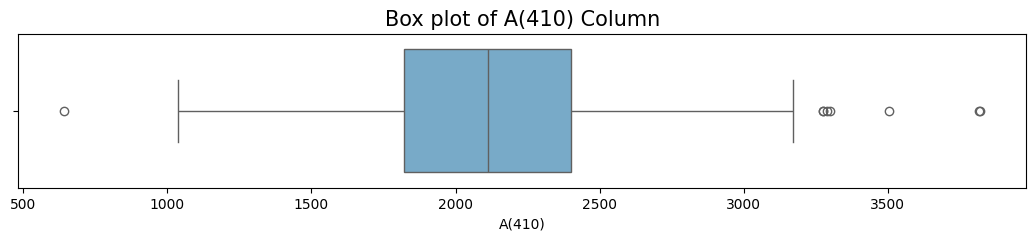

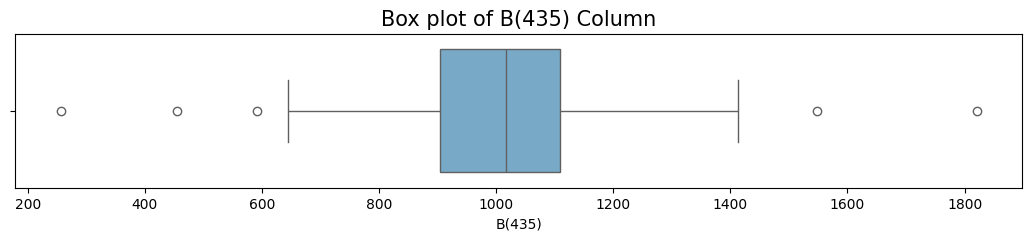

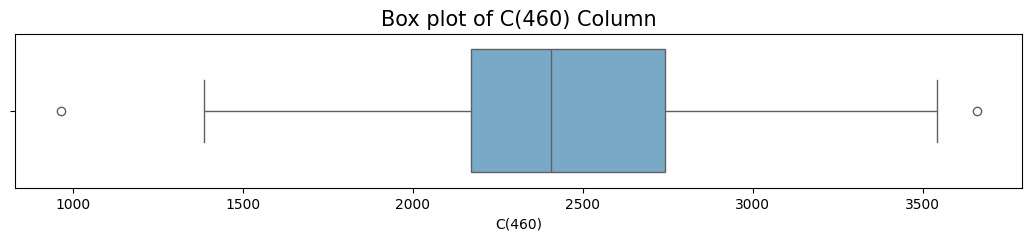

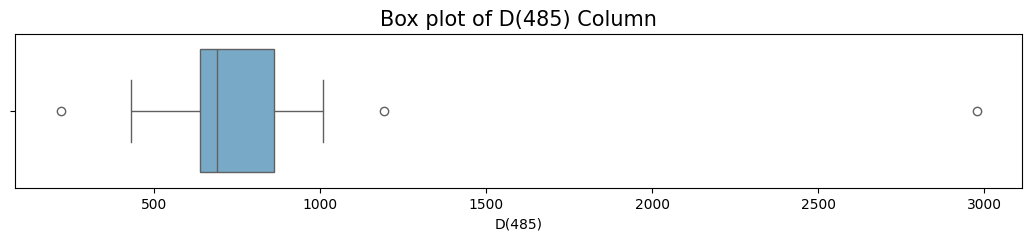

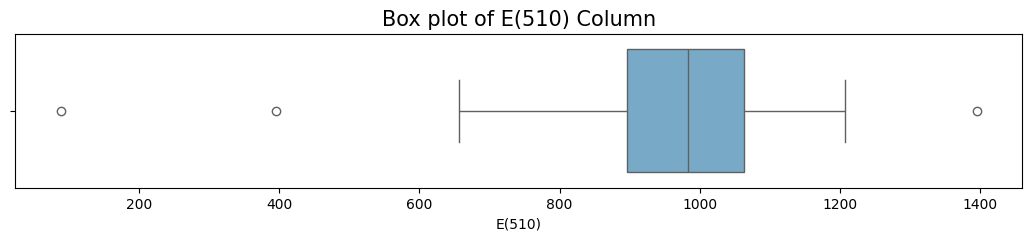

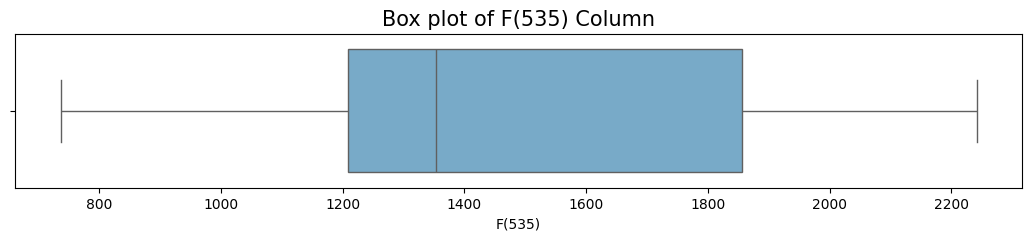

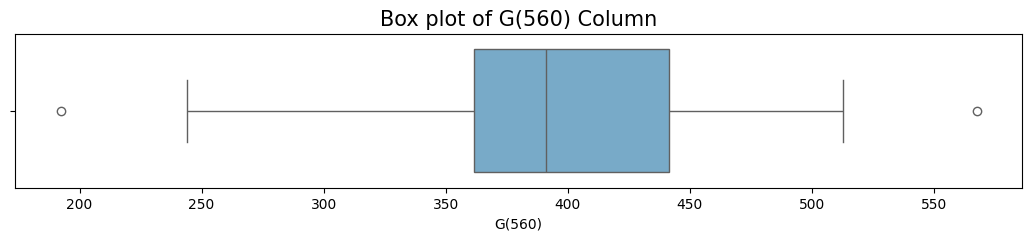

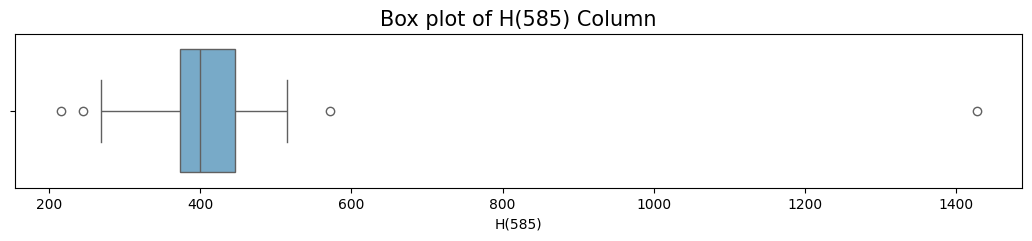

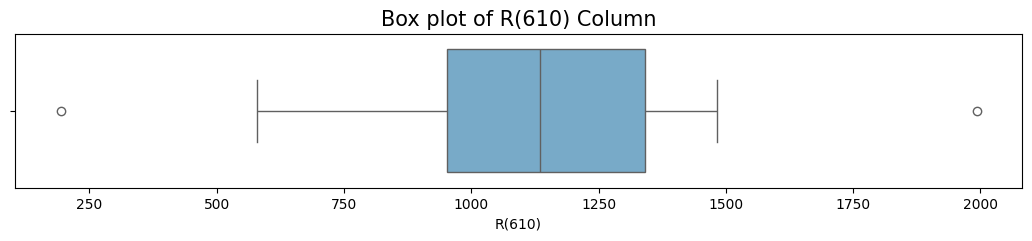

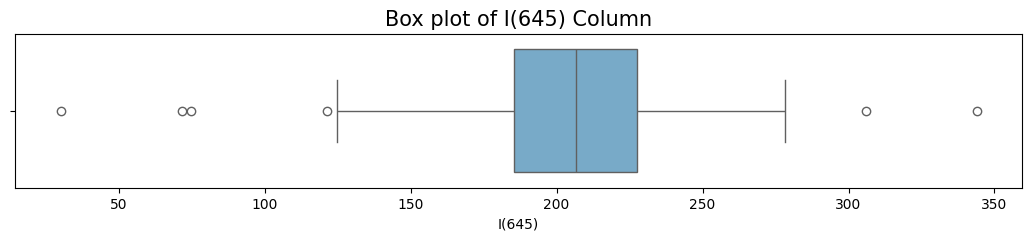

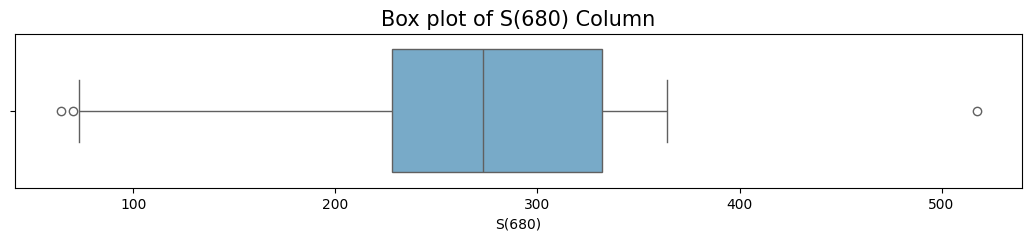

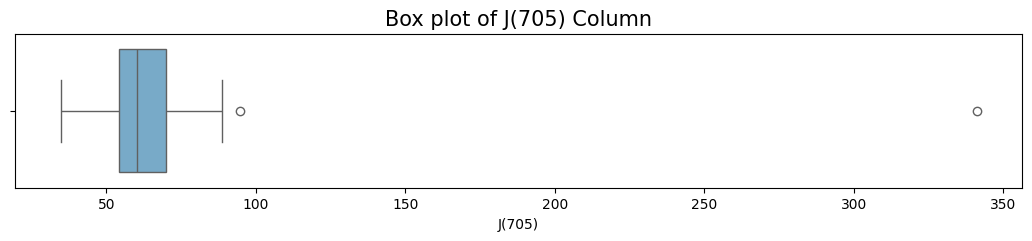

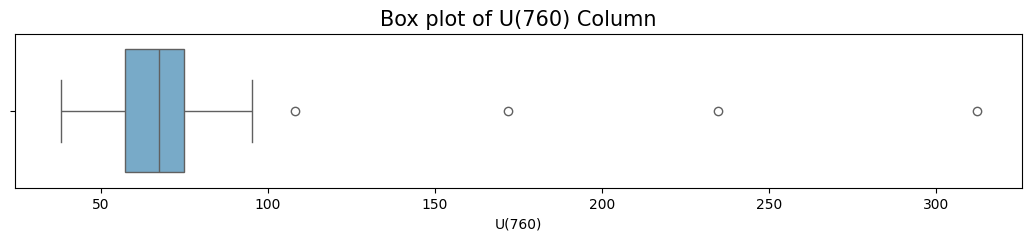

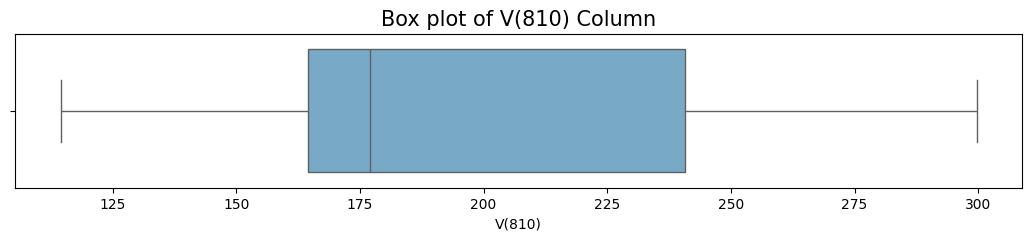

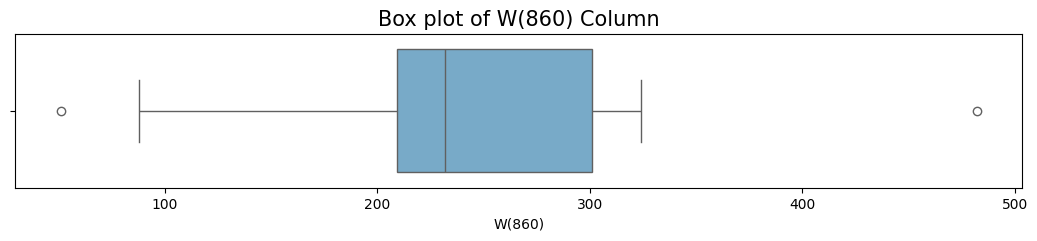

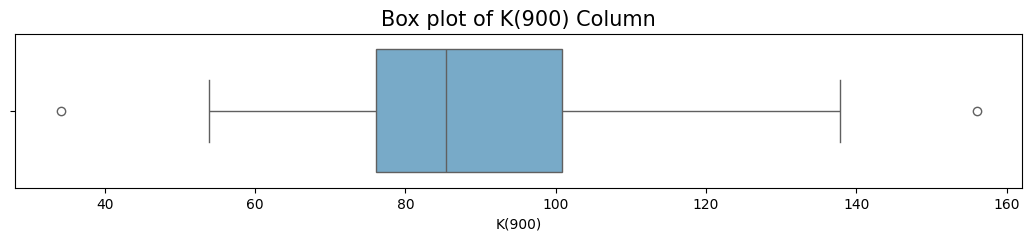

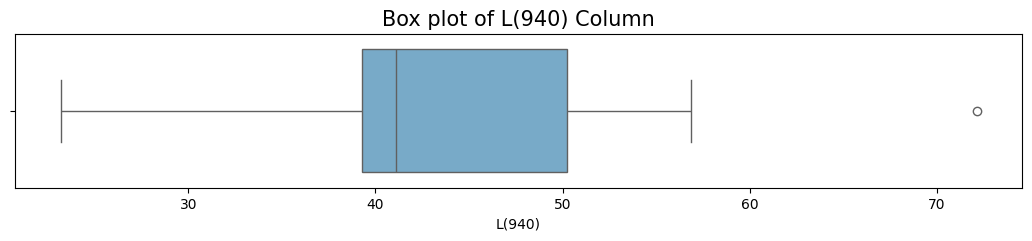

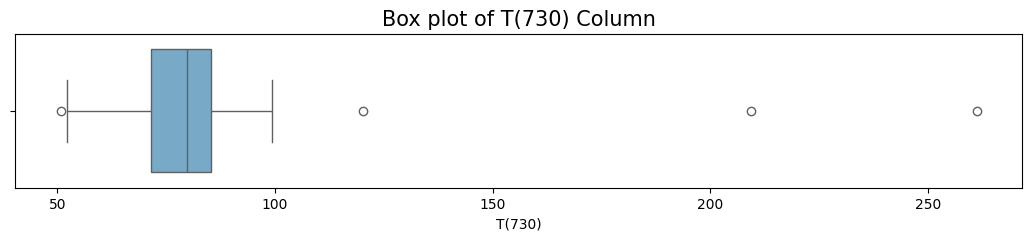

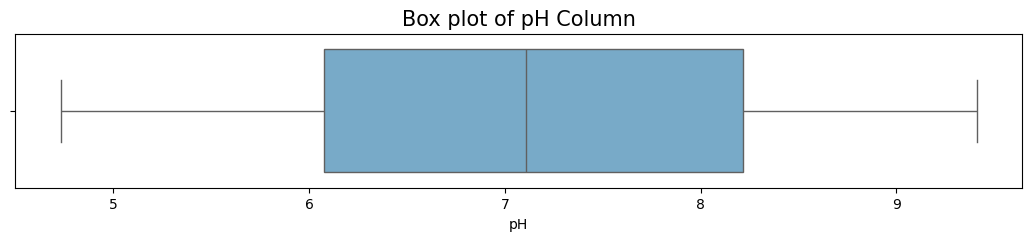

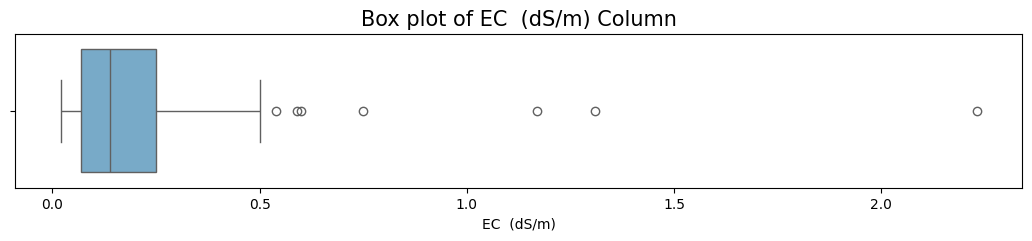

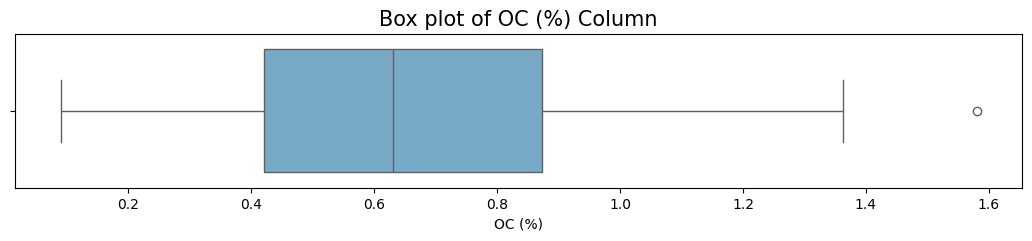

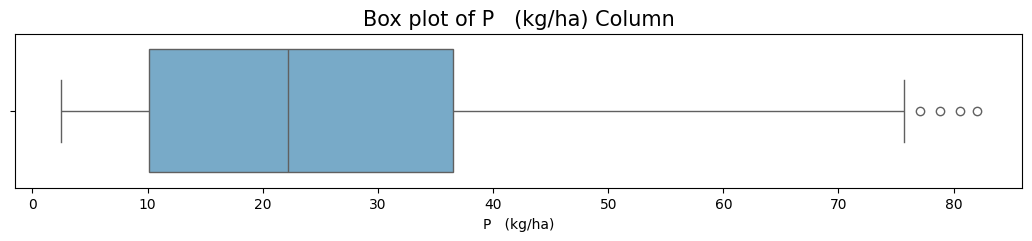

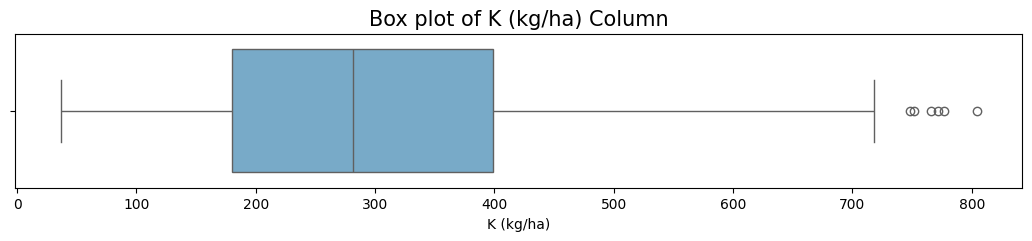

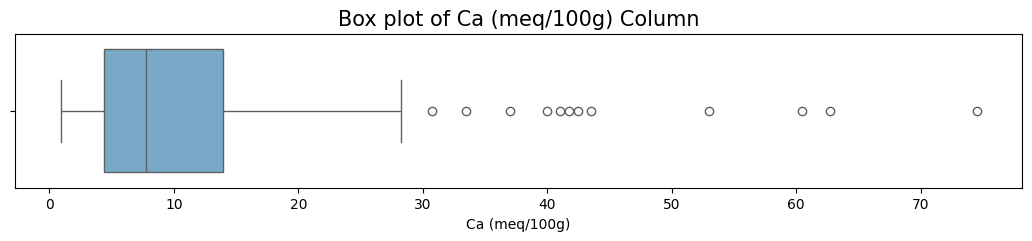

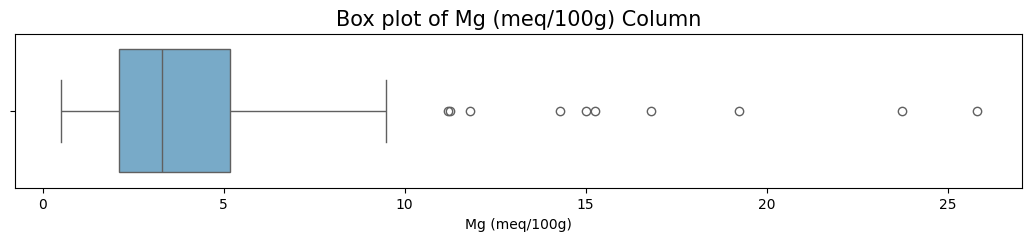

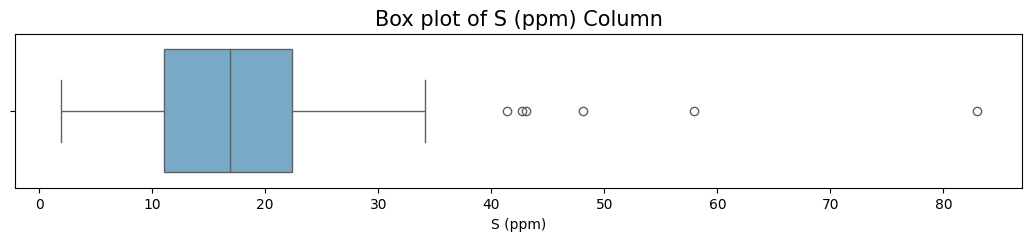

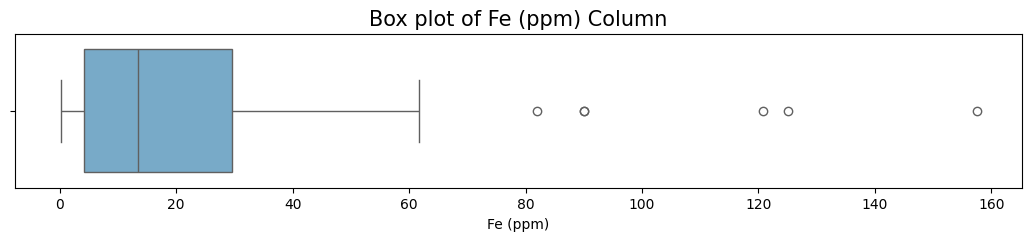

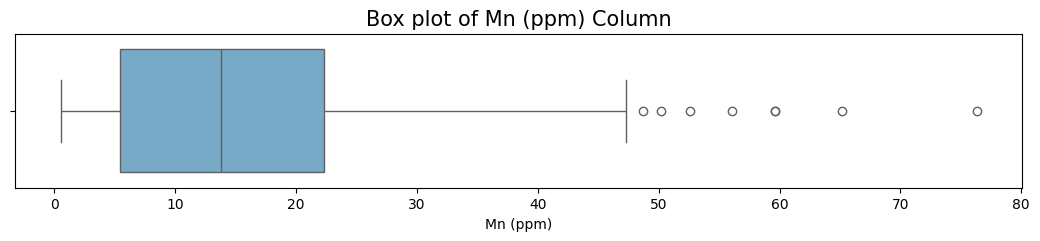

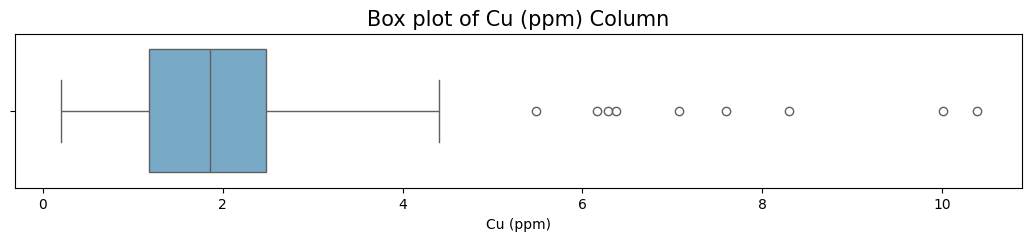

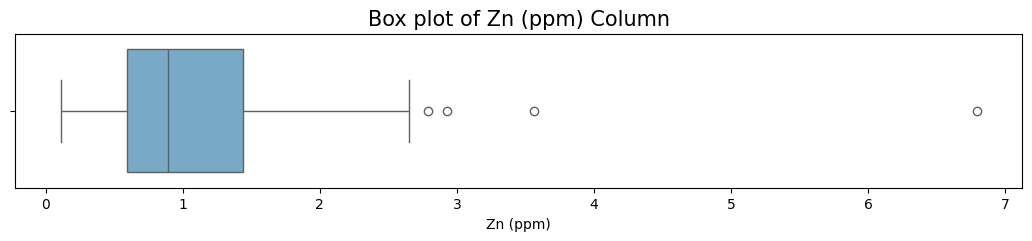

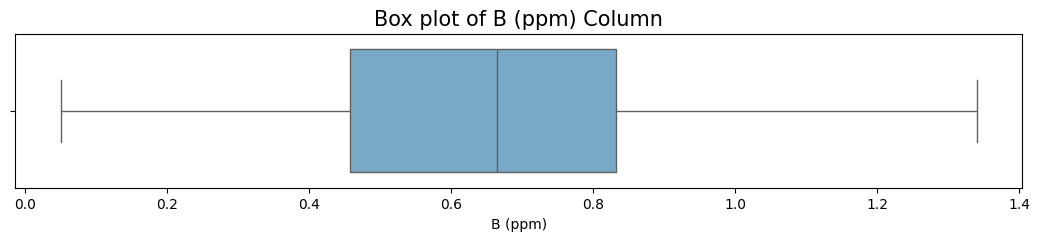

In [11]:
for col in c:

    plt.figure(figsize=(13, 2))
    sns.boxplot(x=df[col],palette='Blues')
    plt.title(f'Box plot of {col} Column', fontsize=15 )

In [37]:
for col in c:
    # Access the column data
    column = df[col]
    
    # Calculate the quartiles
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    # Calculate the IQR (Interquartile Range)
    IQR = Q3 - Q1
    
    # Calculate the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers in the column
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    
    # Calculate the number of outliers
    num_outliers = len(outliers)
    
    # Print the number of outliers in the current column
    print(f"Column '{col}' has {num_outliers} outliers.")


Column 'A(410)' has 8 outliers.
Column 'B(435)' has 5 outliers.
Column 'C(460)' has 2 outliers.
Column 'D(485)' has 3 outliers.
Column 'E(510)' has 3 outliers.
Column 'F(535)' has 0 outliers.
Column 'G(560)' has 2 outliers.
Column 'H(585)' has 4 outliers.
Column 'R(610)' has 2 outliers.
Column 'I(645)' has 6 outliers.
Column 'S(680)' has 3 outliers.
Column 'J(705)' has 2 outliers.
Column 'U(760)' has 4 outliers.
Column 'V(810)' has 0 outliers.
Column 'W(860)' has 2 outliers.
Column 'K(900)' has 2 outliers.
Column 'L(940)' has 1 outliers.
Column 'T(730)' has 4 outliers.
Column 'pH' has 0 outliers.
Column 'EC  (dS/m)' has 7 outliers.
Column 'OC (%)' has 1 outliers.
Column 'P   (kg/ha)' has 4 outliers.
Column 'K (kg/ha)' has 6 outliers.
Column 'Ca (meq/100g)' has 12 outliers.
Column 'Mg (meq/100g)' has 10 outliers.
Column 'S (ppm)' has 6 outliers.
Column 'Fe (ppm)' has 6 outliers.
Column 'Mn (ppm)' has 8 outliers.
Column 'Cu (ppm)' has 9 outliers.
Column 'Zn (ppm)' has 4 outliers.
Column 

In [13]:
#Since there are very few outliers we are not removing any of it

<Axes: >

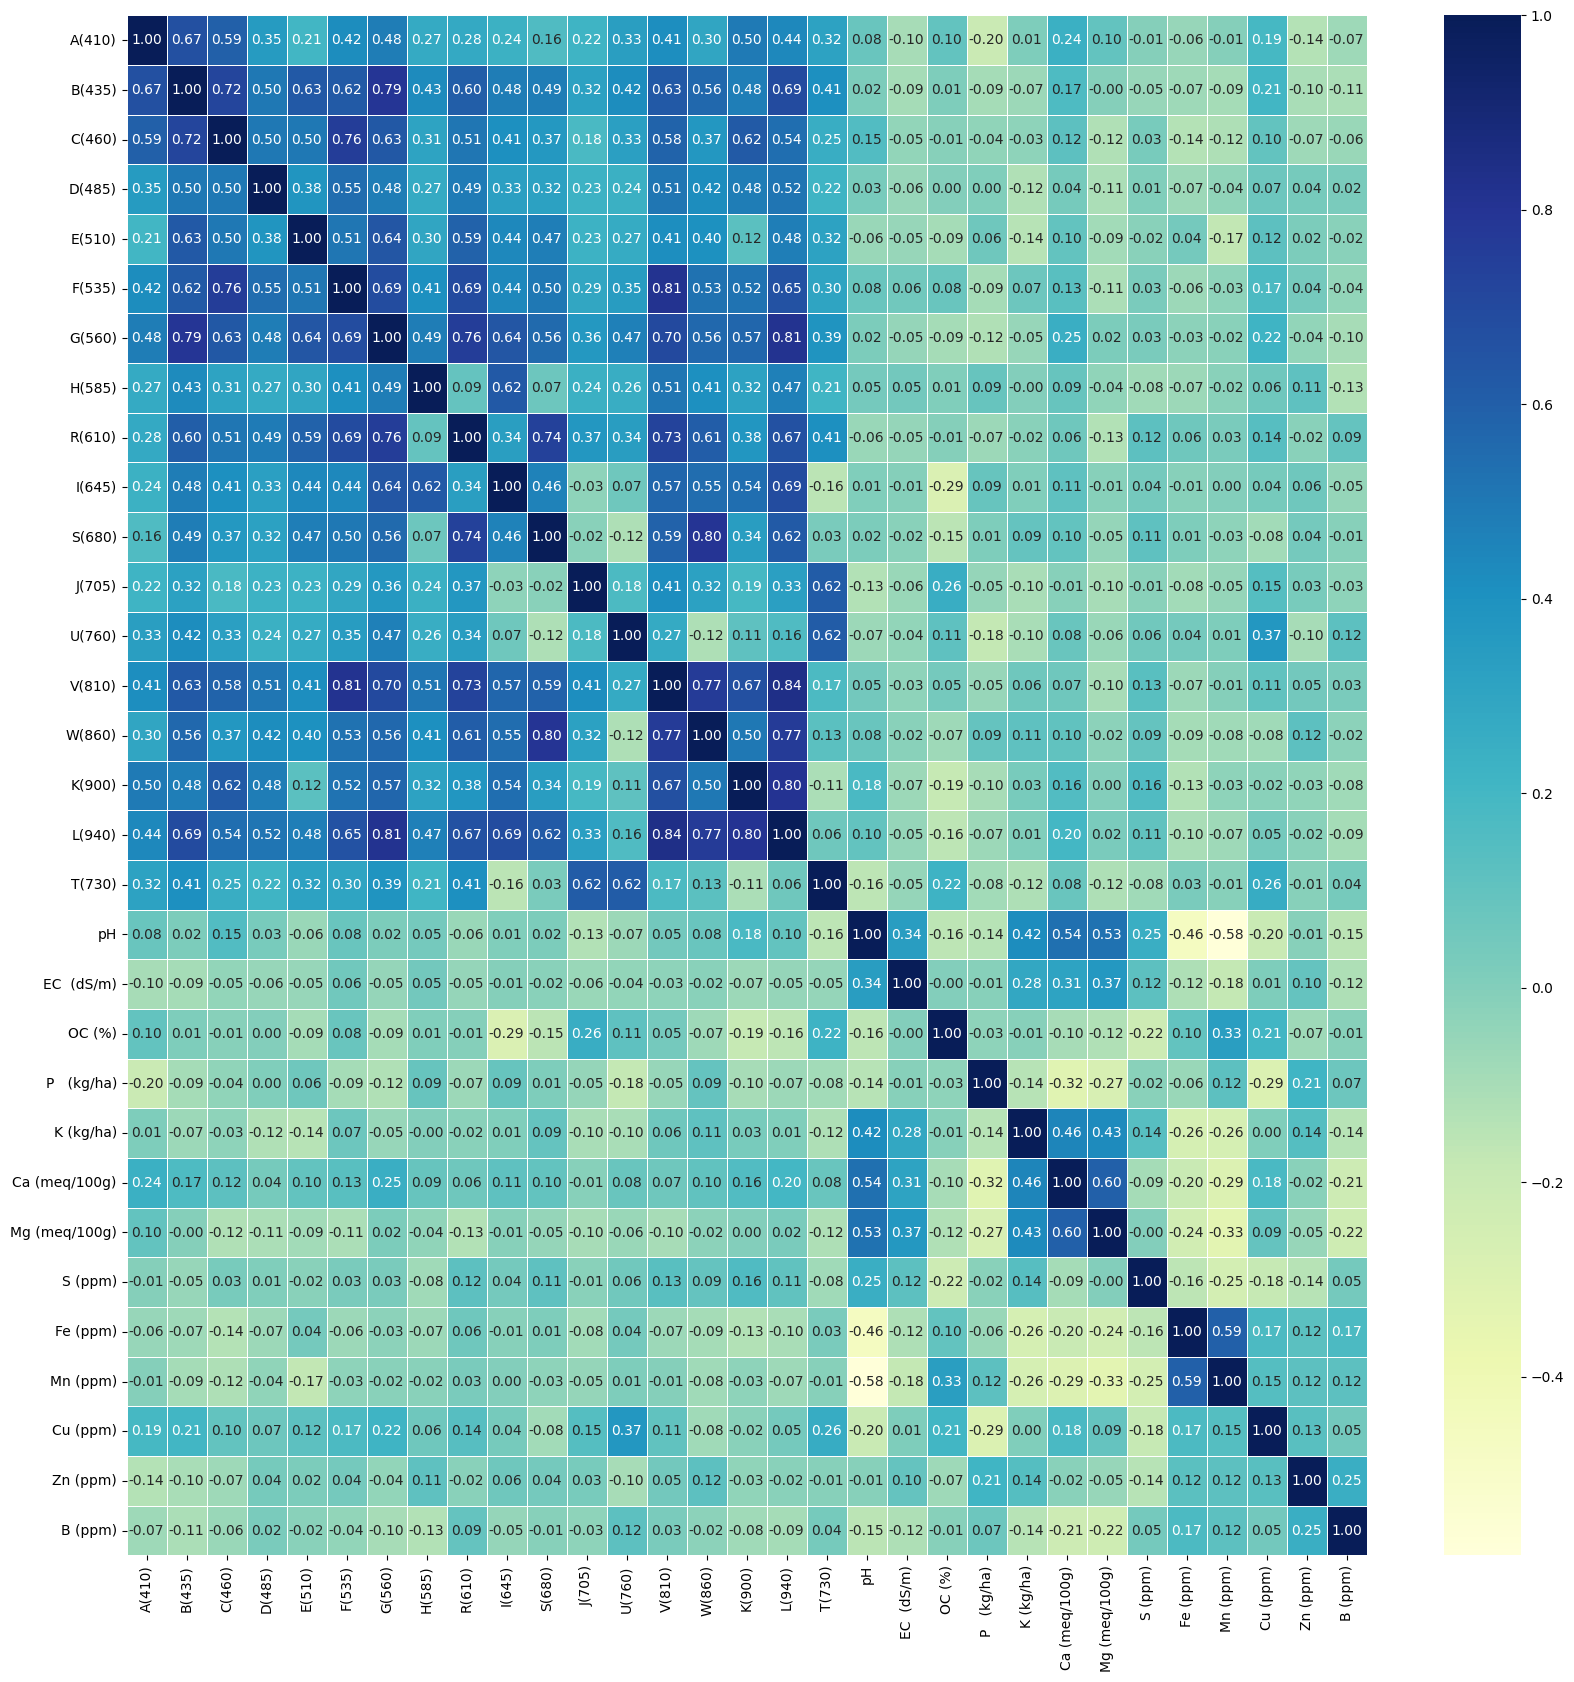

In [14]:
cm = df.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)


In [38]:
feature_columns = ['A(410)', 'B(435)', 'C(460)', 'D(485)', 'E(510)', 'F(535)', 'G(560)',
                   'H(585)', 'R(610)', 'I(645)', 'S(680)', 'J(705)', 'U(760)',
                   'V(810)', 'W(860)', 'K(900)', 'L(940)', 'T(730)']
target_columns = ['pH', 'EC  (dS/m)','OC (%)','P   (kg/ha)', 'K (kg/ha)', 'Ca (meq/100g)', 'Mg (meq/100g)',
             'S (ppm)', 'Fe (ppm)', 'Mn (ppm)', 'Cu (ppm)', 'Zn (ppm)', 'B (ppm)']

In [39]:
# Separate features (X) and target variables (y)
X = df[feature_columns]
y = df[target_columns]

# Transforming the data- Feature Engineering

In [40]:
# Standardisation
#importing libraries for data transformation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xts = scaler.fit_transform(X) #X train and test scaled

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xts, y, test_size=0.2, random_state=42)

In [42]:
print("Samples in Training data ", len(X_train))
print("Samples in Testing data ", len(X_test))

Samples in Training data  80
Samples in Testing data  20


# Model Training 

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train Random Forest Regressor model for multiple target variables
rfr = RandomForestRegressor(random_state=42)

# Wrap Random Forest Regressor in MultiOutputRegressor to handle multiple outputs
multioutput_rfr = MultiOutputRegressor(rfr)

# Fit the Random Forest Regressor model
multioutput_rfr.fit(X_train, y_train)

# Predict for the test set
y_pred_rfr = multioutput_rfr.predict(X_test)
y_pred_train_rfr=multioutput_rfr.predict(X_train)
# Calculate performance metrics
mse_rfr = mean_squared_error(y_test, y_pred_rfr)
mae_rfr = mean_absolute_error(y_test, y_pred_rfr)
rmse_rfr = np.sqrt(mse_rfr)
r2_rfr = r2_score(y_test, y_pred_rfr)
r2_train_rfr = r2_score(y_train, y_pred_train_rfr)

print("Random Forest Regressor Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse_rfr:.4f}")
print(f"Mean Absolute Error (MAE): {mae_rfr:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rfr:.4f}")
print(f"R² Score: {r2_rfr:.4f}")
print(f"R² Score on Training Data: {r2_train_rfr:.4f}")

Random Forest Regressor Performance Metrics:
Mean Squared Error (MSE): 4283.1648
Mean Absolute Error (MAE): 18.5869
Root Mean Squared Error (RMSE): 65.4459
R² Score: -0.2098
R² Score on Training Data: 0.8218


In [21]:
#It indicates the model is overfitted

# Grid Search CV - Hyperparameter tuning 

In [22]:

import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming X and y are your predictors and target variables
# X = ... (shape: [100, 18])
# y = ... (shape: [100, 13])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize RandomForestRegressor
rfr = RandomForestRegressor(random_state=42)

# Wrap RandomForestRegressor in MultiOutputRegressor
multioutput_rfr = MultiOutputRegressor(rfr)

# Define the parameter grid for GridSearchCV
param_grid = {
    'estimator__n_estimators': [50, 100, 200],
    'estimator__max_depth': [None, 10, 20, 30],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(multioutput_rfr, param_grid, cv=3, scoring='r2', verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
print("Best parameters found: ", grid_search.best_params_)

# Use the best estimator to predict
best_model = grid_search.best_estimator_
y_pred_rfr = best_model.predict(X_test)
y_pred_train_rfr = best_model.predict(X_train)

# Calculate R² score for the training set
r2_train_rfr = r2_score(y_train, y_pred_train_rfr)

# Calculate R² score for the test set
r2_rfr = r2_score(y_test, y_pred_rfr)

# Print performance metrics
print("Random Forest Regressor Performance Metrics with Tuned Hyperparameters:")
print(f"R² Score on Training Data: {r2_train_rfr:.4f}")
print(f"R² Score on Test Data: {r2_rfr:.4f}")
print(f"Mean Squared Error (MSE) on Test Data: {mean_squared_error(y_test, y_pred_rfr):.4f}")
print(f"Mean Absolute Error (MAE) on Test Data: {mean_absolute_error(y_test, y_pred_rfr):.4f}")
print(f"Root Mean Squared Error (RMSE) on Test Data: {np.sqrt(mean_squared_error(y_test, y_pred_rfr)):.4f}")


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters found:  {'estimator__max_depth': None, 'estimator__min_samples_leaf': 4, 'estimator__min_samples_split': 10, 'estimator__n_estimators': 200}
Random Forest Regressor Performance Metrics with Tuned Hyperparameters:
R² Score on Training Data: 0.5068
R² Score on Test Data: -0.1026
Mean Squared Error (MSE) on Test Data: 3809.4877
Mean Absolute Error (MAE) on Test Data: 17.6747
Root Mean Squared Error (RMSE) on Test Data: 61.7210


# Choosing the important features

In [23]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming X and y are your predictors and target variables
# X = ... (shape: [100, 18])
# y = ... (shape: [100, 13])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest to get feature importances
rfr = RandomForestRegressor(random_state=42)
multioutput_rfr = MultiOutputRegressor(rfr)
multioutput_rfr.fit(X_train, y_train)

# Get feature importances (average across all outputs)
feature_importances = np.mean([tree.feature_importances_ for tree in multioutput_rfr.estimators_], axis=0)

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print("Feature importances:")
print(feature_importance_df)

# Select top N features (e.g., top 10 features)
top_n_features = feature_importance_df['Feature'].values[:10]

# Create a new dataset with only the top N features
X_train_selected = X_train[top_n_features]
X_test_selected = X_test[top_n_features]

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'estimator__n_estimators': [50, 100, 200],
    'estimator__max_depth': [None, 10, 20, 30],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(MultiOutputRegressor(RandomForestRegressor(random_state=42)), param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_selected, y_train)

# Best parameters from GridSearchCV
print("Best parameters found: ", grid_search.best_params_)

# Use the best estimator to predict
best_model = grid_search.best_estimator_
y_pred_rfr = best_model.predict(X_test_selected)
y_pred_train_rfr = best_model.predict(X_train_selected)

# Calculate R² score for the training set with selected features
r2_train_rfr = r2_score(y_train, y_pred_train_rfr)

# Calculate R² score for the test set with selected features
r2_rfr = r2_score(y_test, y_pred_rfr)

# Print performance metrics
print("Random Forest Regressor Performance Metrics with Selected Features:")
print(f"R² Score on Training Data: {r2_train_rfr:.4f}")
print(f"R² Score on Test Data: {r2_rfr:.4f}")
print(f"Mean Squared Error (MSE) on Test Data: {mean_squared_error(y_test, y_pred_rfr):.4f}")
print(f"Mean Absolute Error (MAE) on Test Data: {mean_absolute_error(y_test, y_pred_rfr):.4f}")
print(f"Root Mean Squared Error (RMSE) on Test Data: {np.sqrt(mean_squared_error(y_test, y_pred_rfr)):.4f}")


Feature importances:
   Feature  Importance
0   A(410)    0.096183
5   F(535)    0.091512
1   B(435)    0.079265
2   C(460)    0.074788
4   E(510)    0.069416
14  W(860)    0.064798
8   R(610)    0.063210
15  K(900)    0.059099
10  S(680)    0.058746
17  T(730)    0.047549
12  U(760)    0.044891
9   I(645)    0.040281
6   G(560)    0.037835
3   D(485)    0.035587
7   H(585)    0.035512
16  L(940)    0.035158
13  V(810)    0.034319
11  J(705)    0.031854
Best parameters found:  {'estimator__max_depth': None, 'estimator__min_samples_leaf': 4, 'estimator__min_samples_split': 10, 'estimator__n_estimators': 200}
Random Forest Regressor Performance Metrics with Selected Features:
R² Score on Training Data: 0.4929
R² Score on Test Data: -0.1299
Mean Squared Error (MSE) on Test Data: 3737.7318
Mean Absolute Error (MAE) on Test Data: 17.3952
Root Mean Squared Error (RMSE) on Test Data: 61.1370


Feature importances:
   Feature  Importance
0   A(410)    0.096183
5   F(535)    0.091512
1   B(435)    0.079265
2   C(460)    0.074788
4   E(510)    0.069416
14  W(860)    0.064798
8   R(610)    0.063210
15  K(900)    0.059099
10  S(680)    0.058746
17  T(730)    0.047549
12  U(760)    0.044891
9   I(645)    0.040281
6   G(560)    0.037835
3   D(485)    0.035587
7   H(585)    0.035512
16  L(940)    0.035158
13  V(810)    0.034319
11  J(705)    0.031854


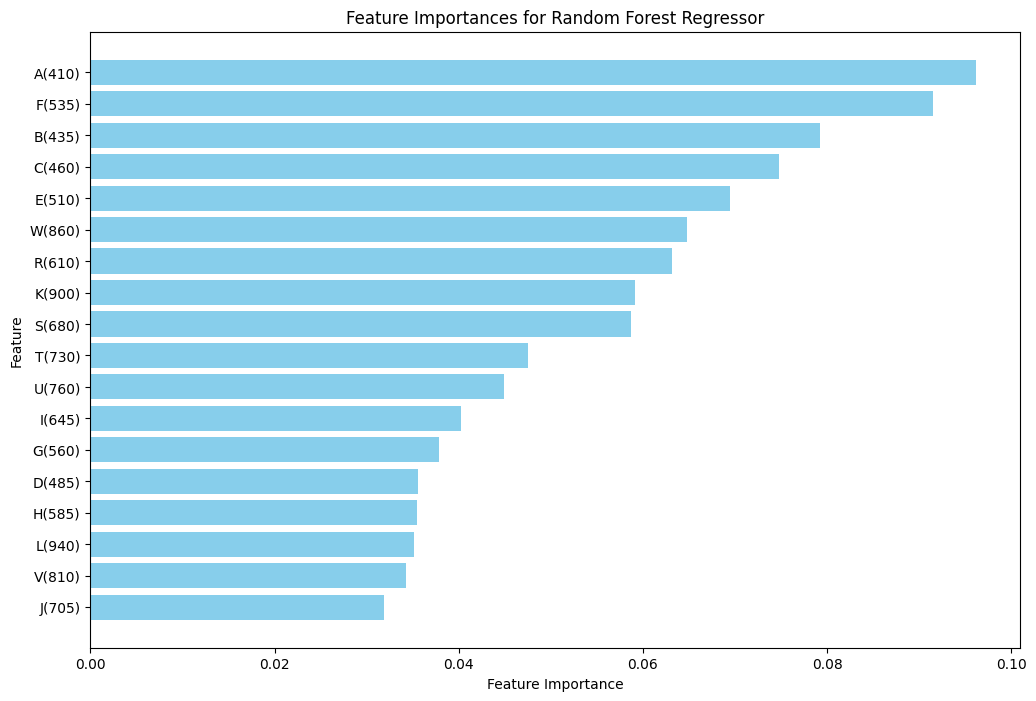

In [46]:
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print("Feature importances:")
print(feature_importance_df)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for Random Forest Regressor')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()

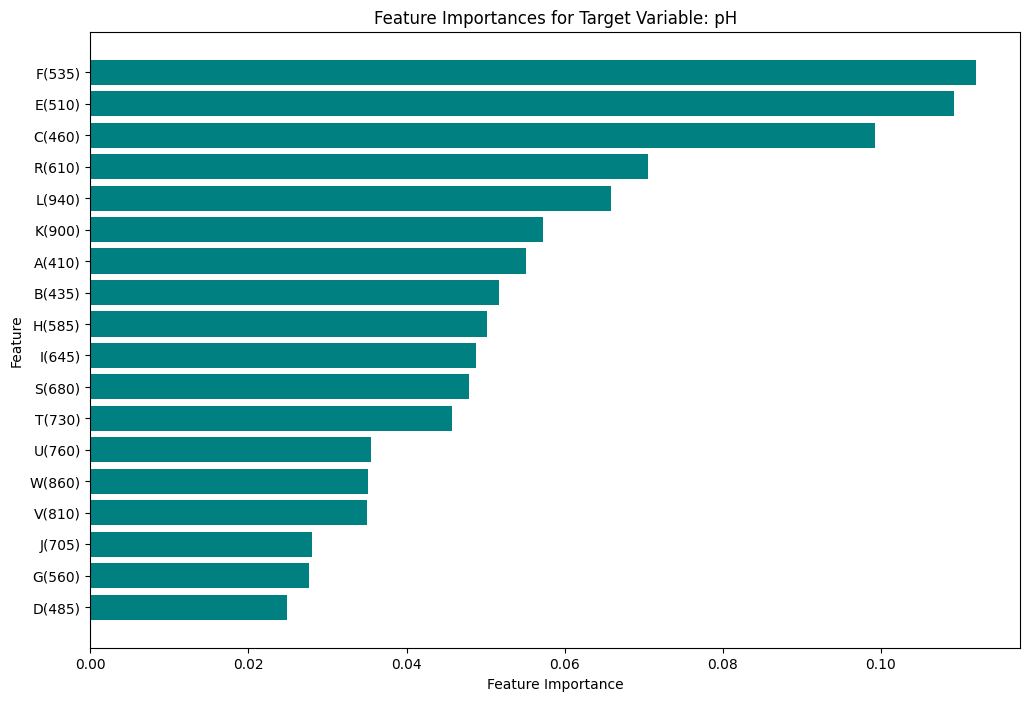

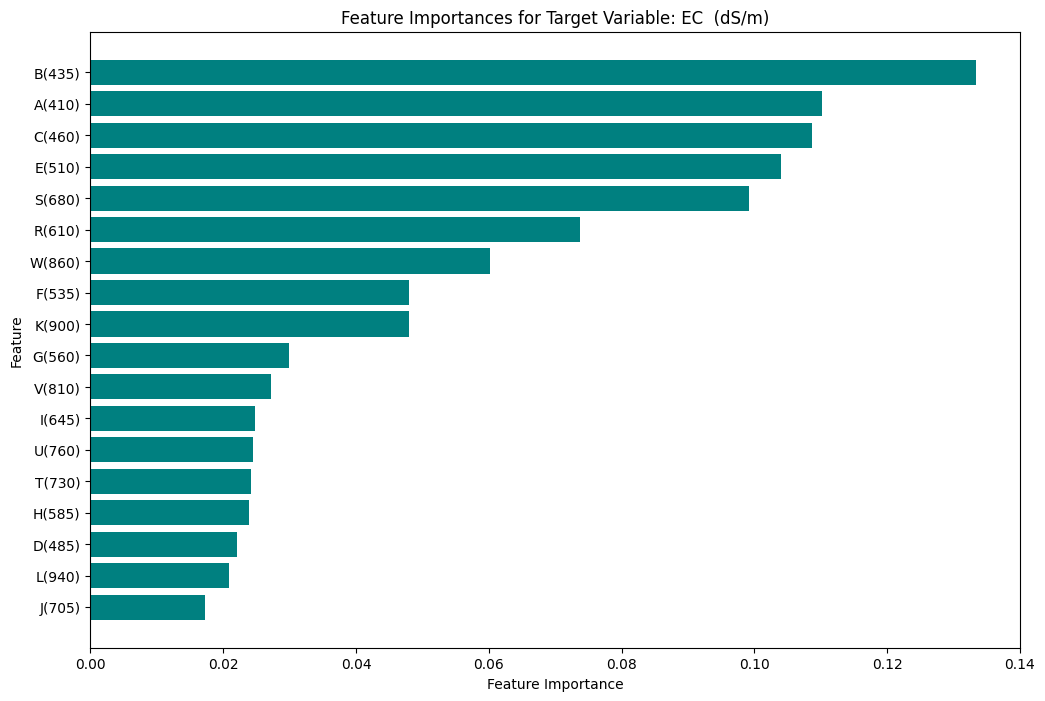

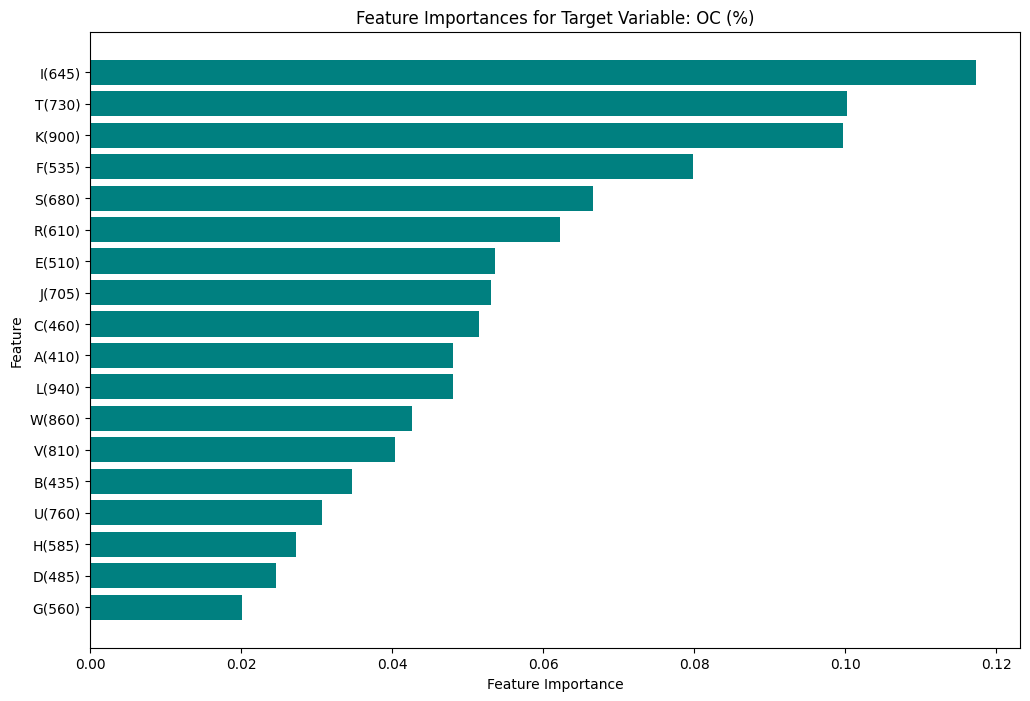

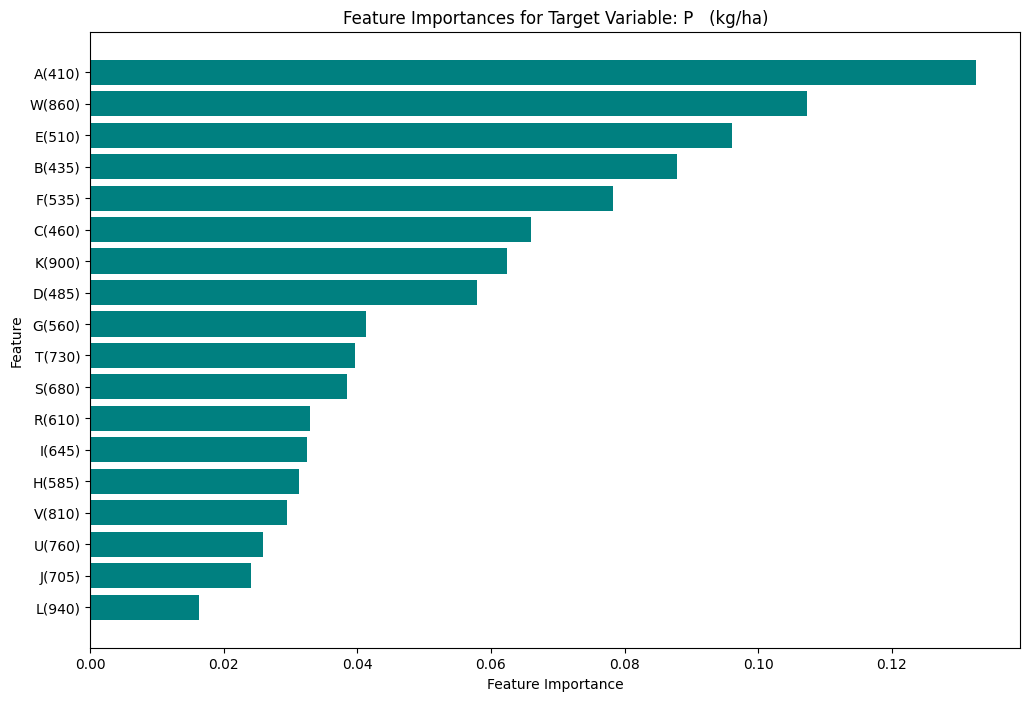

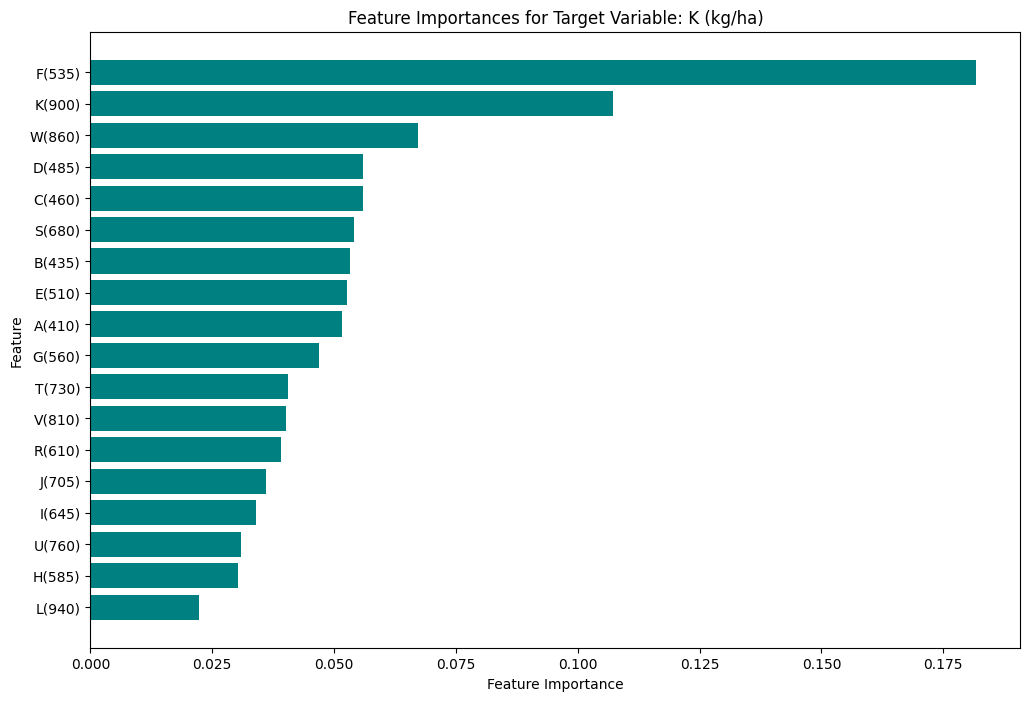

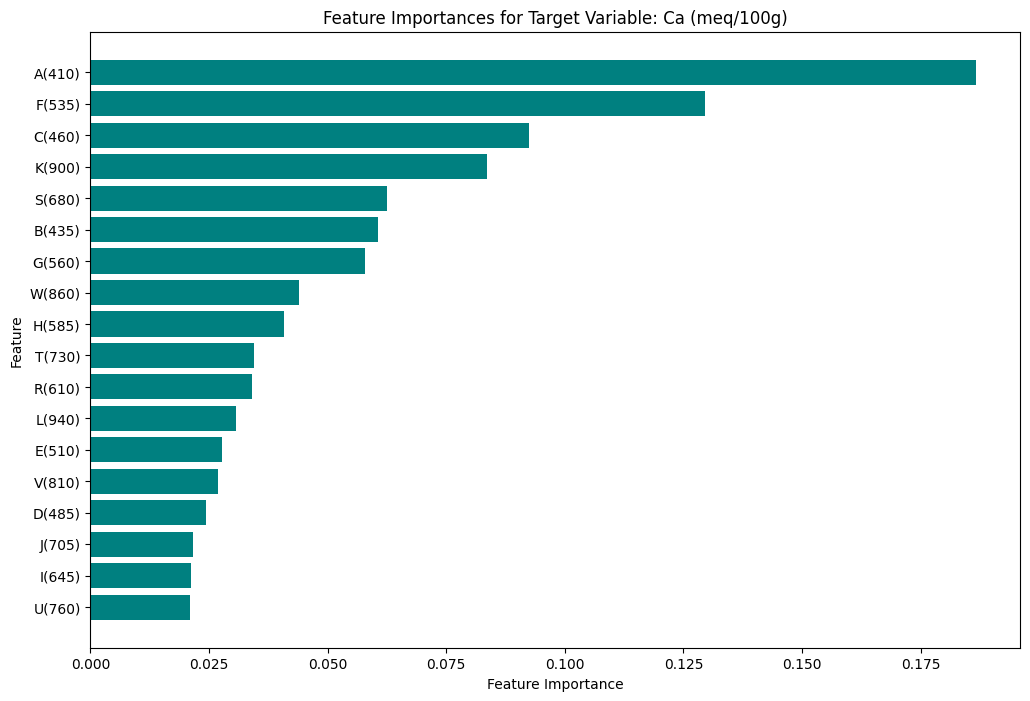

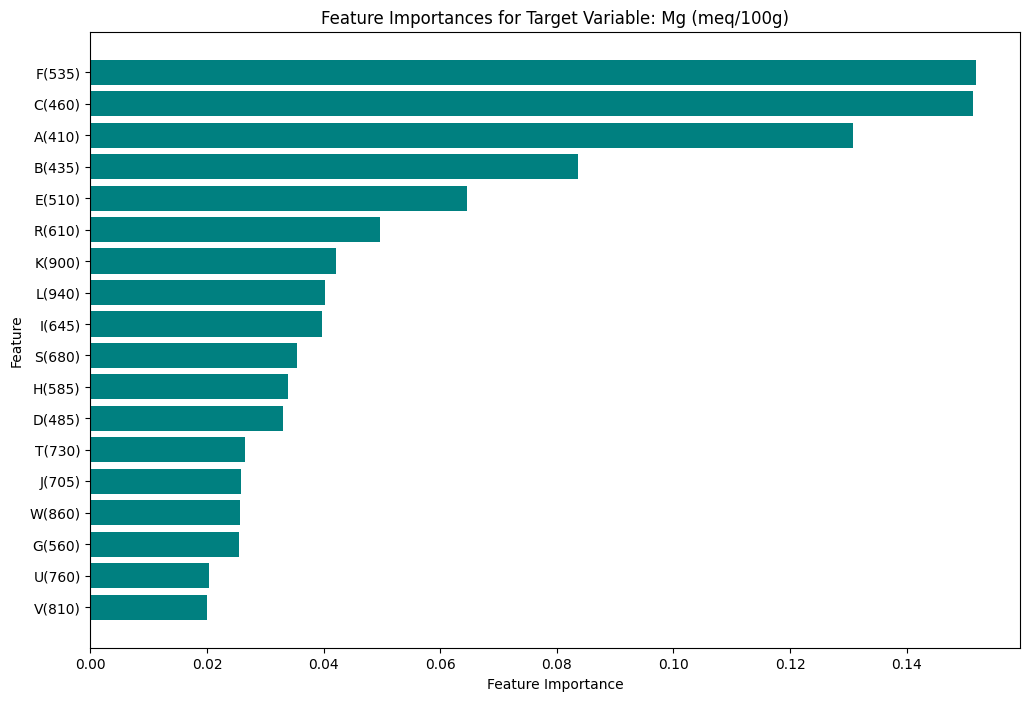

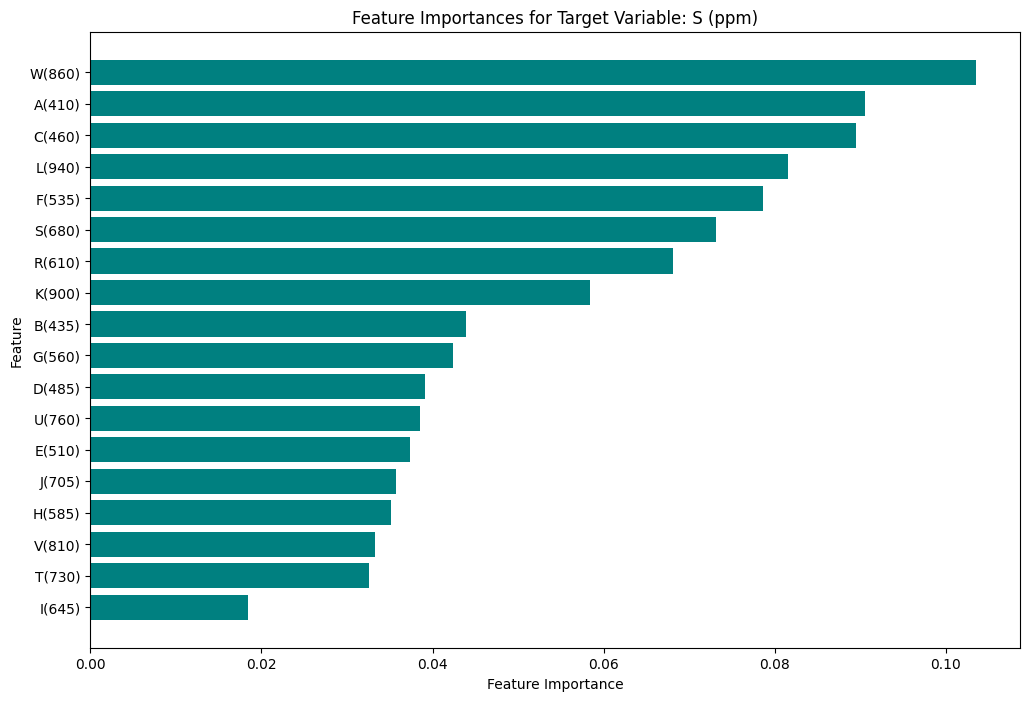

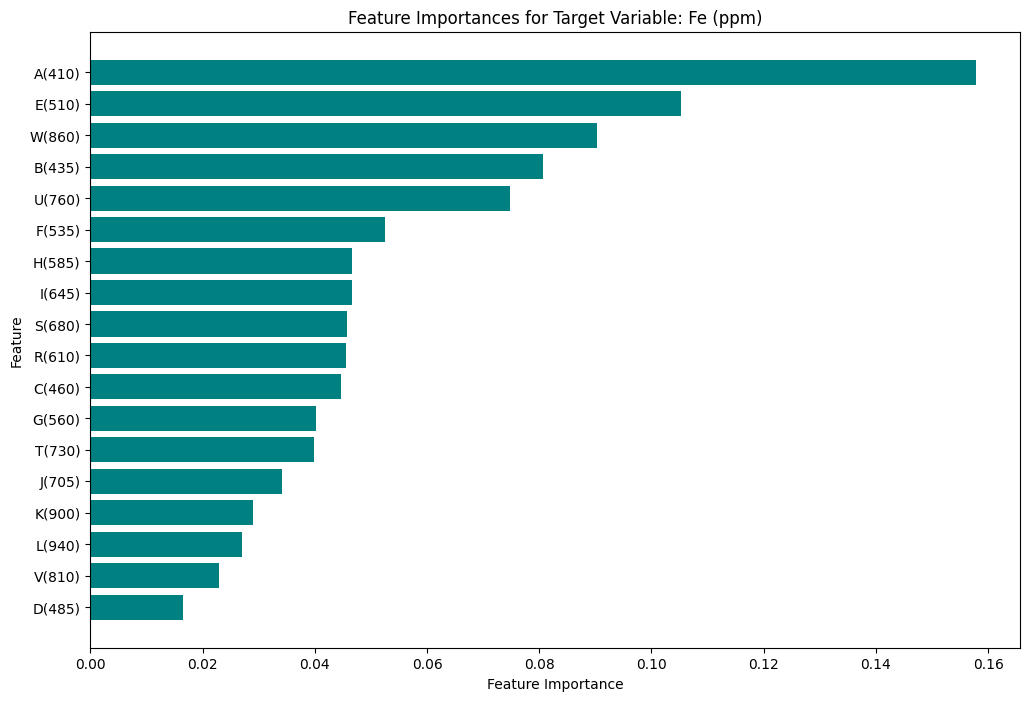

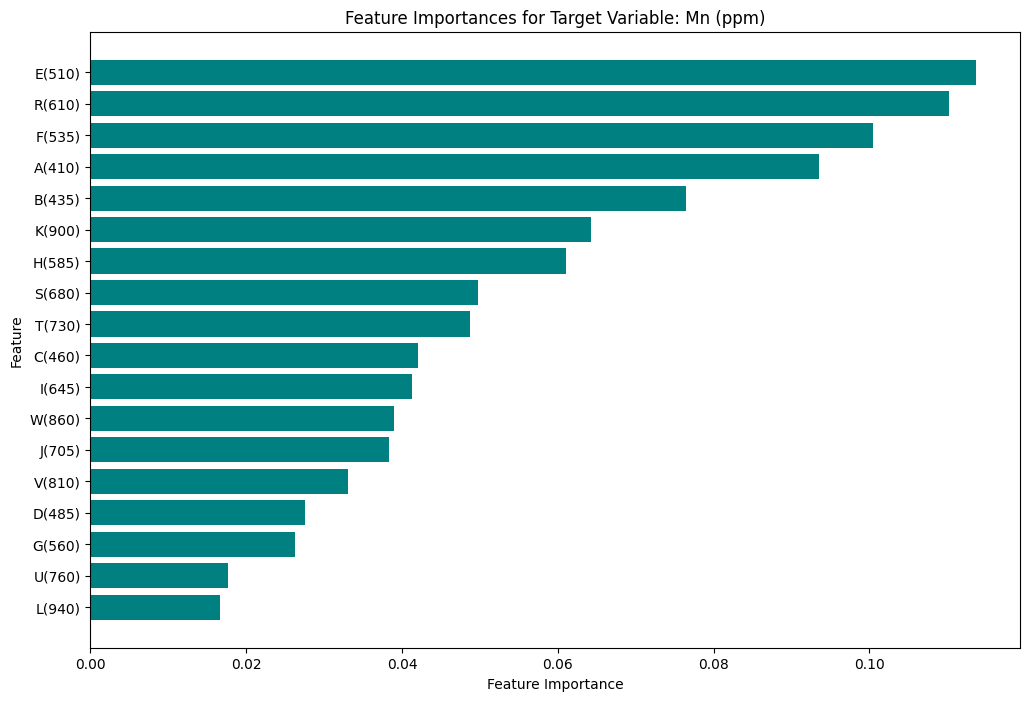

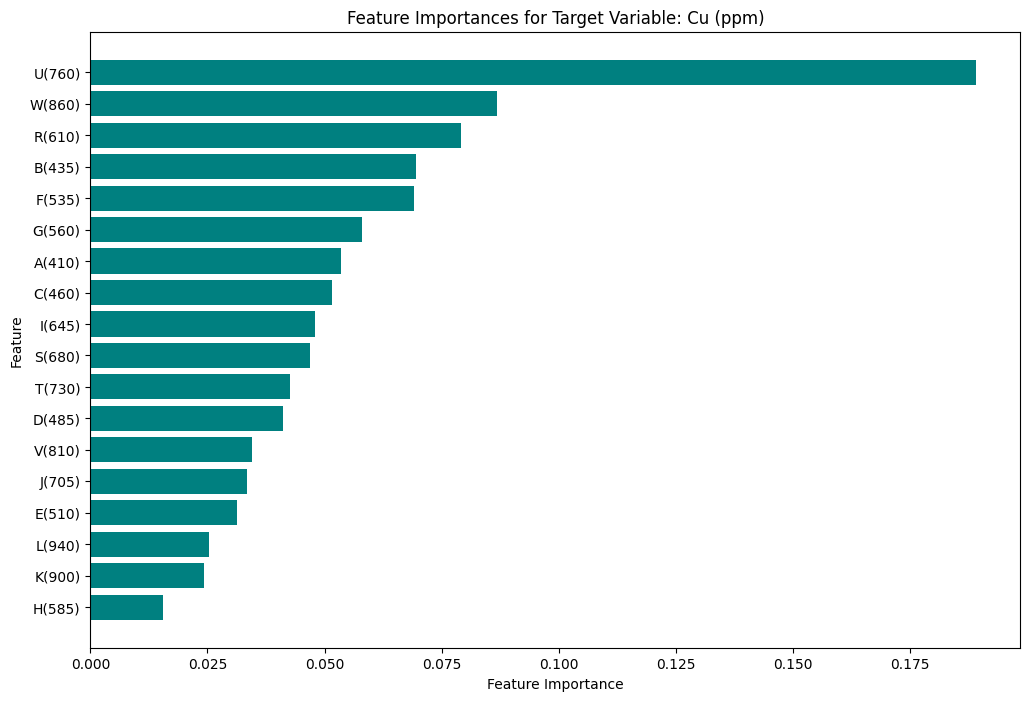

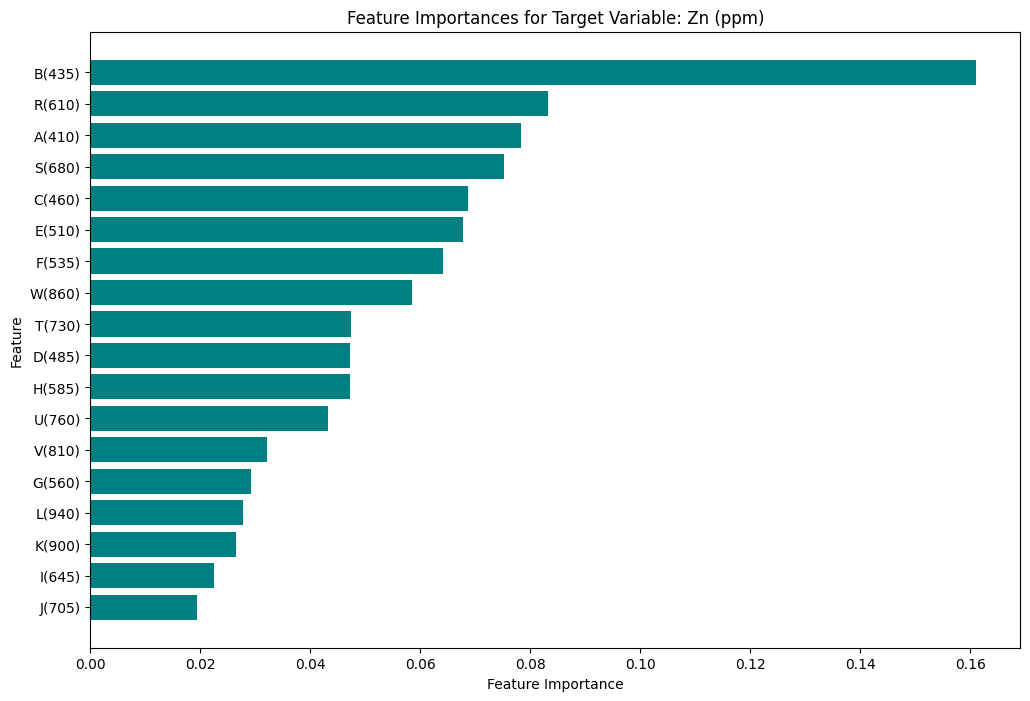

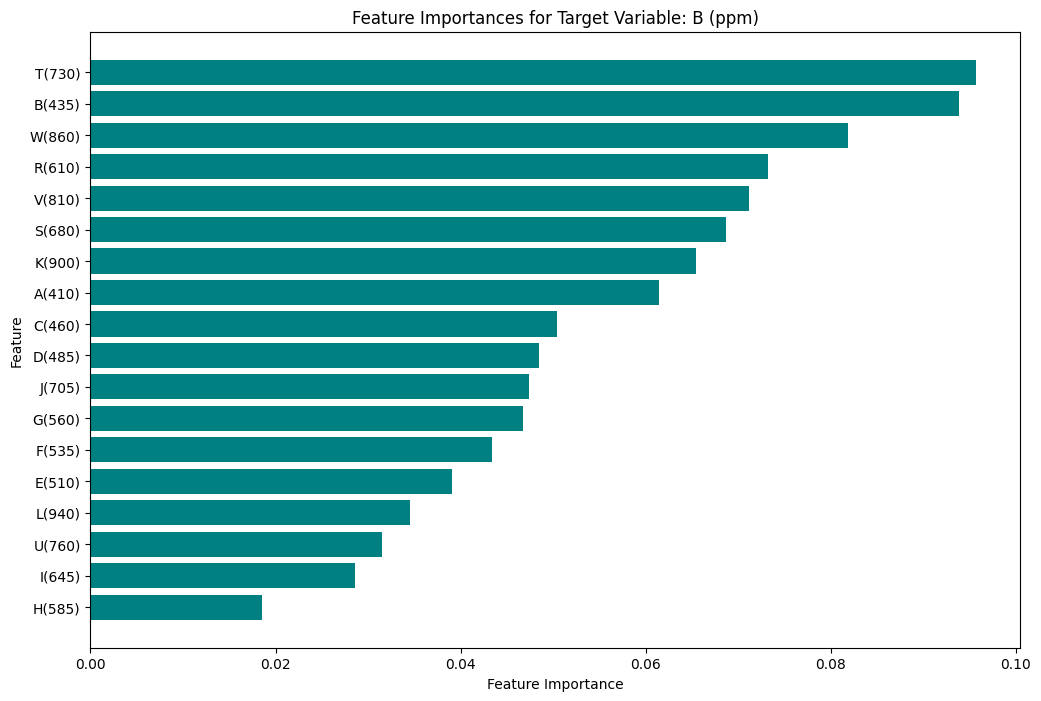

In [48]:
# Get feature importances for each target variable
feature_importances_per_target = [est.feature_importances_ for est in multioutput_rfr.estimators_]

# Convert the results into a DataFrame for better visualization
feature_importance_df = pd.DataFrame(feature_importances_per_target, columns=X.columns, index=y.columns)

# Plot feature importances for each target variable
for target in y.columns:
    plt.figure(figsize=(12, 8))
    sorted_idx = feature_importance_df.loc[target].sort_values(ascending=False).index
    sorted_importances = feature_importance_df.loc[target].sort_values(ascending=False)
    
    plt.barh(sorted_idx, sorted_importances, color='teal')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title(f'Feature Importances for Target Variable: {target}')
    plt.gca().invert_yaxis()  # To display the highest importance at the top
    plt.show()

# Grid Search CV using diffreent parameters (underfitting)

In [27]:
'''rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomForestRegressor(random_state=42)
rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
rf_grid_search.fit(X_train, y_train)

best_rf_model = rf_grid_search.best_estimator_'''

"rf_param_grid = {\n    'n_estimators': [50, 100, 200],\n    'max_depth': [None, 10, 20, 30],\n    'min_samples_split': [2, 5, 10],\n    'min_samples_leaf': [1, 2, 4]\n}\nrf = RandomForestRegressor(random_state=42)\nrf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')\nrf_grid_search.fit(X_train, y_train)\n\nbest_rf_model = rf_grid_search.best_estimator_"

In [28]:
'''from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Training predictions
    y_train_pred = model.predict(X_train)
    
    # Testing predictions
    y_test_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_rmse=np.sqrt(train_mse)
    
    # Print the metrics
    print(f"Mean Squared Error (MSE): {train_mse}")
    print(f"R-squared (R2) Score: {train_r2}")
    print(f"R-squared on test data(R2) Score: {test_r2}")
    print(f"Mean Absolute Error (MAE): {train_mae}")
    print(f"Root Mean Squared Error (RMSE): {train_rmse}")

# Apply the function for each model
print("Random Forest Model Evaluation:")
evaluate_model(best_rf_model, X_train, X_test, y_train, y_test)'''

'from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error\n\ndef evaluate_model(model, X_train, X_test, y_train, y_test):\n    # Training predictions\n    y_train_pred = model.predict(X_train)\n    \n    # Testing predictions\n    y_test_pred = model.predict(X_test)\n    \n    # Calculate evaluation metrics\n    train_mse = mean_squared_error(y_train, y_train_pred)\n    test_mse = mean_squared_error(y_test, y_test_pred)\n    train_r2 = r2_score(y_train, y_train_pred)\n    test_r2 = r2_score(y_test, y_test_pred)\n    train_mae = mean_absolute_error(y_train, y_train_pred)\n    test_mae = mean_absolute_error(y_test, y_test_pred)\n    train_rmse=np.sqrt(train_mse)\n    \n    # Print the metrics\n    print(f"Mean Squared Error (MSE): {train_mse}")\n    print(f"R-squared (R2) Score: {train_r2}")\n    print(f"R-squared on test data(R2) Score: {test_r2}")\n    print(f"Mean Absolute Error (MAE): {train_mae}")\n    print(f"Root Mean Squared Error (RMSE): {train_rmse}")\n\n# 

In [25]:
import pickle

with open('rfc.pkl', 'wb') as file :
    pickle.dump(multioutput_rfr,file)

In [26]:
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

{'pH': 7.277100701754384, 'EC  (dS/m)': 0.3910073684210527, 'OC (%)': 0.6958748421052633, 'P   (kg/ha)': 25.493444210526327, 'K (kg/ha)': 435.19876105263177, 'Ca (meq/100g)': 25.798892028985506, 'Mg (meq/100g)': 9.954167368421052, 'S (ppm)': 18.55314736842106, 'Fe (ppm)': 23.3500149122807, 'Mn (ppm)': 18.034041052631583, 'Cu (ppm)': 3.0810184210526317, 'Zn (ppm)': 1.8876052631578946, 'B (ppm)': 0.5564726315789476}


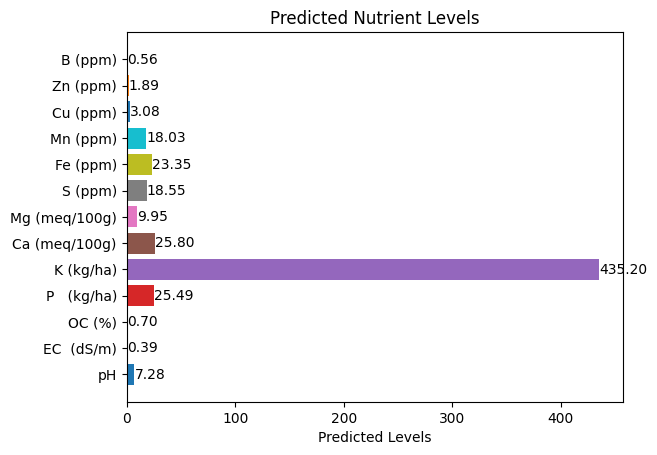

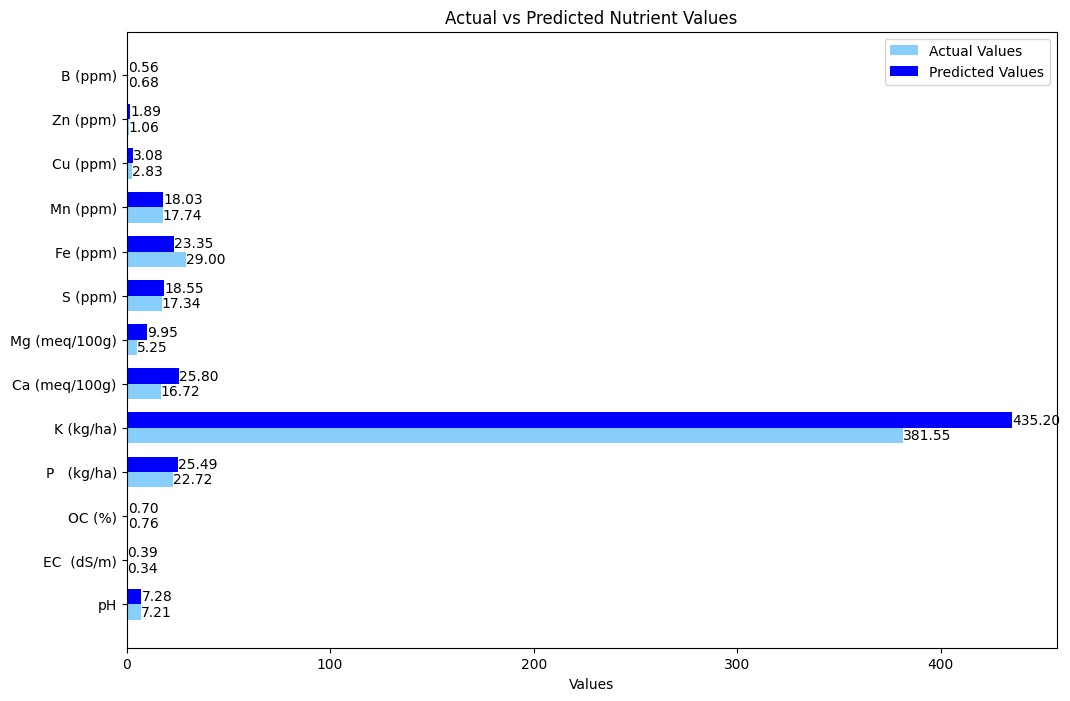

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors as mcolors

# Sample data
data = {
    'A(410)': [2429],
    'B(435)': [1108],
    'C(460)': [2091],
    'D(485)': [737],
    'E(510)': [835],
    'F(535)': [1376],
    'G(560)': [322],
    'H(585)': [318],
    'R(610)': [1305],
    'I(645)': [163],
    'S(680)': [332],
    'J(705)': [51],
    'U(760)': [76],
    'V(810)': [237],
    'W(860)': [305],
    'K(900)': [60],
    'L(940)': [38],
    'T(730)': [84]
}

# Convert input data to DataFrame
def preprocess_input_data(input_data):
    input_df = pd.DataFrame(input_data)
    return input_df

df2 = preprocess_input_data(data)
scaled_input = scaler.transform(df2)
prediction = multioutput_rfr.predict(scaled_input)

# Predicted Nutrient Levels
predicted_values = {}
for i, col in enumerate(target_columns):
    predicted_values[col] = prediction[0][i]

print(predicted_values)

# Plotting bar graph to represent the predicted nutrient levels
colors = list(mcolors.TABLEAU_COLORS.values())
fig, ax = plt.subplots()
bars = ax.barh(list(predicted_values.keys()), list(predicted_values.values()), color=colors[:len(predicted_values)])
ax.set_xlabel('Predicted Levels')
ax.set_title('Predicted Nutrient Levels')

# Adding color to each bar and displaying the value
for bar, value in zip(bars, predicted_values.values()):
    ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{value:.2f}', va='center')

plt.show()

# Plot for actual vs predicted values
plt.figure(figsize=(12, 8))

# Bar width for both actual and predicted values
bar_width = 0.35

# Indices for nutrient labels
indices = np.arange(len(target_columns))


# Plot actual values
actual_bars = plt.barh(indices - bar_width / 2, y_test.mean(), bar_width, label='Actual Values', color='lightskyblue')

# Plot predicted values
predicted_bars = plt.barh(indices + bar_width / 2, [predicted_values[col] for col in target_columns], bar_width, label='Predicted Values', color='blue')

# Adding nutrient labels
plt.yticks(indices, target_columns)

# Adding labels and title
plt.xlabel('Values')
plt.title('Actual vs Predicted Nutrient Values')
plt.legend()

# Adding values on the bars
for actual_bar, predicted_bar in zip(actual_bars, predicted_bars):
    plt.text(actual_bar.get_width(), actual_bar.get_y() + actual_bar.get_height() / 2, f'{actual_bar.get_width():.2f}', va='center')
    plt.text(predicted_bar.get_width(), predicted_bar.get_y() + predicted_bar.get_height() / 2, f'{predicted_bar.get_width():.2f}', va='center')

plt.show()
